<br>
<img src="img/caged.png" width='1200' >
<br>

### Desafio 1 - CAGED

#### Módulo Análise Exploratória Introdução

25/03/2020

Camila Bezerra

1. **Importar as bibliotecas e ler os dados:** Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

In [1]:
# Importando bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando dados
df = pd.read_csv('C:/Users/camil/Desktop/CAGEDEST_122018.csv', encoding = 'latin1', engine = 'python', delimiter = ';', sep = ',')

### Dataset

* Shape: 2256752 x 42
* Cross-section:
        - 27 UFs
        - Unidade de análise: empregado
* Ano: 2018

In [3]:
# imprimir informações sobre o data frame
df.info()

# shape = 2256752 x 42
# tipos das colunas
## 27 são integer
## 15 são objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           object
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            object
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm D

In [4]:
#dimensão temporal
df['Ano Declarado'].unique()

array([2018], dtype=int64)

In [5]:
#dimensão espacial
df['UF'].nunique()

27

In [6]:
#Drop as colunas que nao serao usadas
df = df.drop(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Qtd Hora Contrat', 'IBGE Subsetor', 
       'Ind Aprendiz', 'Ind Portador Defic', 
       'Saldo Mov', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'], axis=1)

In [7]:
# renomeando as colunas
df.rename(columns={'Grau Instrução': 'grau_instrucao', 
                   'Idade': 'idade', 
                   'Raça Cor': 'etnia',
                  'Sexo': 'sexo',
                  'Salário Mensal': 'salario_mensal'}, 
          inplace=True)

2. **Limpeza e transformação da variável alvo Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

In [8]:
# Limpando a coluna de salario para processamento

## trocar vírgula por ponto
df['salario_mensal'] = df['salario_mensal'].apply(lambda x: x.replace(',', '.'))

## transformar em float
df['salario_mensal'] = df['salario_mensal'].astype(float)

### Variável salário mensal

* Operacionaliza: salário mensal;
* Contínua;
* Observações com valor 0.
* Média = 1627.24
* Sd = 2097.52
* 95%IC: [1624.50; 1629.98]

In [9]:
## Estatísticas das variaveis de interesse
df['salario_mensal'].describe()

count    2.256752e+06
mean     1.627244e+03
std      2.097521e+03
min      0.000000e+00
25%      1.066000e+03
50%      1.271000e+03
75%      1.600000e+03
max      1.428300e+05
Name: salario_mensal, dtype: float64

In [10]:
sm.stats.DescrStatsW(df['salario_mensal']).tconfint_mean()

(1624.507614877465, 1629.9808313496794)

In [11]:
#Investigar as linhas que contêm salario como 0
df_0 = df[df.salario_mensal <= 0.0]
df_0.describe()

,grau_instrucao,idade,etnia,salario_mensal,sexo
count,24245.000000,24245.000000,24245.000000,24245.0,24245.000000
mean,7.092638,33.317385,5.297216,0.0,1.471437
std,1.759200,11.804624,3.113697,0.0,0.499194
min,1.000000,14.000000,1.000000,0.0,1.000000
25%,7.000000,24.000000,2.000000,0.0,1.000000
50%,7.000000,32.000000,8.000000,0.0,1.000000
75%,9.000000,41.000000,8.000000,0.0,2.000000
max,9.000000,90.000000,9.000000,0.0,2.000000


In [12]:
#excluir as linhas que contêm salario == 0, porque não é coerente algum receber salario == 0.
new_df = df[df.salario_mensal > 0.0]
new_df = new_df.reset_index(drop=True)

Text(-522.0, 710000, 'Mediana')

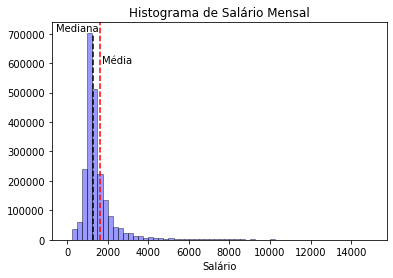

In [13]:
sns.distplot(new_df['salario_mensal'], hist=True, kde=False, bins=int(60),color = 'blue', hist_kws={"range": [0,15000], 'edgecolor':'black'})
plt.title('Histograma de Salário Mensal')
plt.xlabel('Salário')
media_salario = new_df['salario_mensal'].mean()
plt.axvline(media_salario, color = 'red', ls = '--')
plt.text(media_salario + 100,600000,'Média')
mediana_salario = new_df['salario_mensal'].median()
plt.vlines(x = mediana_salario,  ymin=0, ymax=700000, ls = '--')
plt.text(mediana_salario -1800,710000,'Mediana')

Text(0.5, 0, 'Salário Mensal')

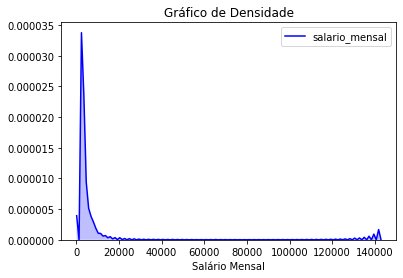

In [14]:
# Kernell density plot
sns.kdeplot(new_df['salario_mensal'], kernel='gau',shade=True, color="blue")

## Adicionar legenda
plt.title('Gráfico de Densidade')
plt.xlabel('Salário Mensal')

### Log Salário Mensal

In [15]:
## transformar essa distribuição em normal
new_df['log_salario'] = np.log(new_df['salario_mensal'])
new_df['log_salario'].describe()

count    2.232507e+06
mean     7.237505e+00
std      4.751255e-01
min      5.659482e+00
25%      6.979145e+00
50%      7.153052e+00
75%      7.380879e+00
max      1.186941e+01
Name: log_salario, dtype: float64

Text(6.35305163493748, 650000, 'Mediana')

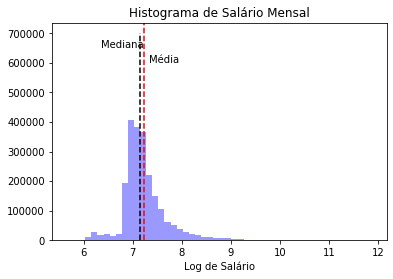

In [16]:
# Plotando histograma com seaborn
## especificar bins e range para extrair mais informacoes sobre o dado
sns.distplot(new_df['log_salario'], hist=True, kde=False,
             bins=int(50),color = 'blue')

# Adicionar legenda
plt.title('Histograma de Salário Mensal')
plt.xlabel('Log de Salário')

# Adicionar linha de media
media_log_salario = new_df['log_salario'].mean()
plt.axvline(media_log_salario, color = 'red', ls = '--')
plt.text(media_log_salario + 0.1, 600000,'Média')

# Adicionar linha da mediana
mediana_log_salario = new_df['log_salario'].median()
plt.vlines(x = mediana_log_salario,  ymin=0, ymax=700000, ls = '--')
plt.text(mediana_log_salario - 0.8,650000,'Mediana')

Text(0.5, 0, 'Salário Mensal')

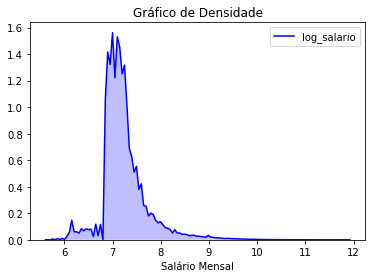

In [17]:
# Kernell density plot
sns.kdeplot(new_df['log_salario'], kernel='gau',shade=True, color="blue")

## Adicionar legenda
plt.title('Gráfico de Densidade')
plt.xlabel('Salário Mensal')

### Teste Shapiro-Wilk para Salário Mensal

* Distribuição Gaussiana ~ 1
* p-value > 0.05 

In [18]:
# fazendo o teste de normalidade de shapiro para salario
a = stats.shapiro(new_df['salario_mensal'])
a

(0.2541969418525696, 0.0)

In [19]:
# fazendo o teste de normalidade de shapiro para log_salario
b = stats.shapiro(new_df['log_salario'])
b

(0.8477897644042969, 0.0)

In [20]:
stats.ttest_ind(a = stats.shapiro(new_df['salario_mensal']),
                b = stats.shapiro(new_df['log_salario']), 
                equal_var = False)

Ttest_indResult(statistic=-0.6706670278527319, pvalue=0.6095798358974294)

### Idade

* Operacionaliza: idade dos empregados;
* Integer
* Média = 32,3
* Sd = 10,95
* Mínimo = 10
* Máximo = 103

In [21]:
# Verificação dos dados da variável idade
new_df.idade.describe()

count    2.232507e+06
mean     3.230333e+01
std      1.095016e+01
min      1.000000e+01
25%      2.300000e+01
50%      3.000000e+01
75%      3.900000e+01
max      1.030000e+02
Name: idade, dtype: float64

Text(16.0, 700000, 'Mediana')

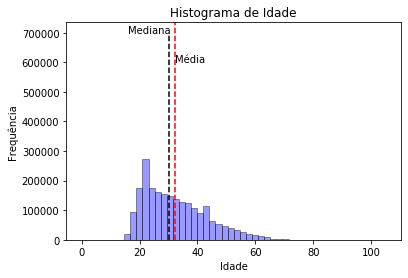

In [22]:
# Plotando histograma com seaborn
sns.distplot(new_df['idade'], hist=True, kde=False,
             bins=int(50),color = 'blue', hist_kws={"range": [0,105], 'edgecolor':'black'})

# Adicionar legenda
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência') ##conferir essa legenda

# Adicionar linha de media
media_idade = new_df['idade'].mean()
plt.axvline(media_idade, color = 'red', ls = '--')
plt.text(media_idade + 0.1, 600000,'Média')

# Adicionar linha da mediana
mediana_idade = new_df['idade'].median()
plt.vlines(x = mediana_idade,  ymin=0, ymax=700000, ls = '--')
plt.text(mediana_idade -14,700000,'Mediana')

Text(0.5, 0, 'Idade')

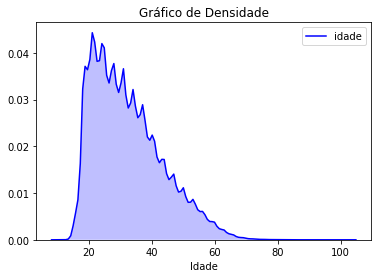

In [23]:
# Kernell density plot
sns.kdeplot(new_df['idade'], shade=True, kernel='gau', color="blue")

## Adicionar legenda
plt.title('Gráfico de Densidade')
plt.xlabel('Idade')

In [24]:
#Investigar as linhas que contêm idade < 14
df_idade = new_df[new_df.idade < 14]
df_idade.describe()

,grau_instrucao,idade,etnia,salario_mensal,sexo,log_salario
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,6.459459,11.108108,5.243243,1289.216216,1.513514,7.139136
std,1.773173,1.125063,3.049639,284.873572,0.506712,0.214156
min,1.000000,10.000000,2.000000,800.000000,1.000000,6.684612
25%,6.000000,10.000000,2.000000,1100.000000,1.000000,7.003065
50%,7.000000,11.000000,6.000000,1221.000000,2.000000,7.107425
75%,7.000000,12.000000,8.000000,1397.000000,2.000000,7.242082
max,9.000000,13.000000,9.000000,1981.000000,2.000000,7.591357


### Correlação Salário Mensal x Idade

In [25]:
## Correlação salário mensal x idade
stats.pearsonr(new_df['log_salario'], new_df['idade'])

#p-value = 0.0: sgnificativo

(0.2751001657787361, 0.0)

Text(0, 0.5, 'Log Salário Mensal')

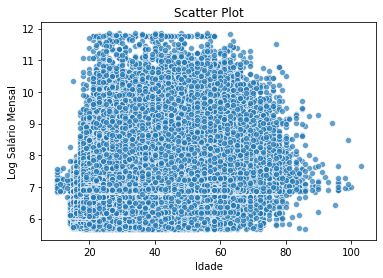

In [26]:
 # Grafico de dispersao
sns.scatterplot(x="idade", y="log_salario", data=new_df, alpha = 0.7)

## Adicionar legenda
plt.title('Scatter Plot')
plt.xlabel('Idade')
plt.ylabel('Log Salário Mensal')

### Grau de instrução

* Operacionalizaça: nível educacional
* Categórica

In [27]:
new_df.grau_instrucao.describe()

count    2.232507e+06
mean     6.590149e+00
std      1.545216e+00
min      1.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      7.000000e+00
max      9.000000e+00
Name: grau_instrucao, dtype: float64

In [28]:
def grau_grupos(grau_instrucao):
    if grau_instrucao == 1:
        return "Analfabeto"
    elif grau_instrucao == 2:
        return "Até 5ª Incompleto"
    elif grau_instrucao == 3:
        return "5ª Fundamental Completo"
    elif grau_instrucao == 4:
        return "6ª a 9ª Fundamental"
    elif grau_instrucao == 5:
        return "Fundamental Completo"
    elif grau_instrucao == 6:
        return "Médio Incompleto"
    elif grau_instrucao == 7:
        return "Médio Completo"
    elif grau_instrucao == 8:
        return "Superior Incompleto"
    elif grau_instrucao == 9:
        return "Superior Completo"

In [29]:
new_df['grau_recode'] = new_df['grau_instrucao'].apply(grau_grupos)

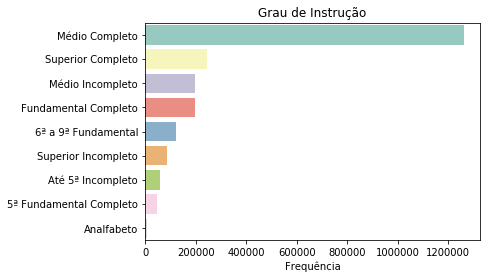

In [30]:
#Grafico de barras
order = ["Médio Completo", "Superior Completo", "Médio Incompleto", "Fundamental Completo", "6ª a 9ª Fundamental", 
         "Superior Incompleto", "Até 5ª Incompleto", "5ª Fundamental Completo", "Analfabeto"]
ax = sns.countplot(data = new_df, y = 'grau_recode', order = order, palette = "Set3")
ax.set_yticklabels(ax.get_yticklabels(), ha="right")
#plt.tight_layout()

# Adicionar legenda
plt.title('Grau de Instrução')
plt.xlabel('Frequência') 
plt.ylabel('') 
plt.show()

In [31]:
### Correlação Salário x Grau Instrução

In [32]:
## Correlação salário X grau_instrucao 
stats.pearsonr(new_df['log_salario'], new_df['grau_instrucao'])

(0.26124653969683825, 0.0)

Text(0, 0.5, 'Salário Mensal')

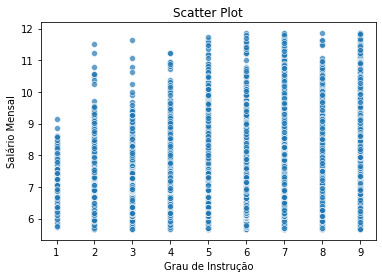

In [33]:
# Grafico de dispersao
sns.scatterplot(x="grau_instrucao", y="log_salario", data=new_df, alpha = 0.7)

## Adicionar legenda
plt.title('Scatter Plot')
plt.xlabel('Grau de Instrução')
plt.ylabel('Salário Mensal')

### Variável sexo

In [34]:
def sexo_func(sexo):
    if sexo == 1:
        return "Masculino"
    elif sexo == 2:
        return "Feminino"

In [35]:
new_df['sexo_recode'] = new_df['sexo'].apply(sexo_func)
new_df['sexo_recode'].value_counts(ascending = True)

Feminino      922195
Masculino    1310312
Name: sexo_recode, dtype: int64

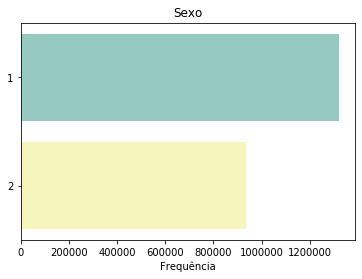

In [36]:
#Grafico de barras
ax = sns.countplot(data = df, y = 'sexo', palette = "Set3")
ax.set_yticklabels(ax.get_yticklabels(), ha="right")
#plt.tight_layout()

# Adicionar legenda
plt.title('Sexo')
plt.xlabel('Frequência') 
plt.ylabel('') 
plt.show()

Text(0.5, 0, 'Sexo')

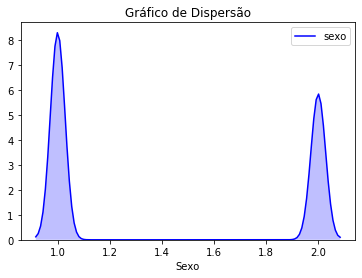

In [37]:
# Kernell density plot
sns.kdeplot(new_df['sexo'], shade=True, kernel='gau', color="blue")

## Adicionar legenda
plt.title('Gráfico de Dispersão')
plt.xlabel('Sexo')

### Correlação Salário X Sexo

In [38]:
## Correlação salário mensal x sexo
stats.pearsonr(new_df['log_salario'], new_df['sexo'])

(-0.10029719869079433, 0.0)

Text(0, 0.5, 'Log Salário Mensal')

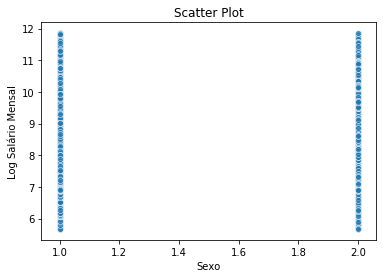

In [39]:
# Grafico de dispersao Salario x Sexo
sns.scatterplot(x="sexo", y="log_salario", data=new_df, alpha = 0.7)

## Adicionar legenda
plt.title('Scatter Plot')
plt.xlabel('Sexo')
plt.ylabel('Log Salário Mensal')

### Homens ganham mais do que mulheres?

* Teste T para amostras independentes
* Regressão bivariada
* H0: $\hat{\beta}_1 = 0$

$\bar{x}_h = \bar{x}_m$
        
* Ha: $\hat{\beta}_1 < 0$

$\bar{x}_h > \bar{x}_m$

* Hipótese nula rejeitada
        * Homens ganham em média 151,48 a mais do que mulheres;

In [40]:
# aplicando o t-test para médias de duas séries entre GSW e NOP
stats.ttest_ind(a=new_df.log_salario[new_df.sexo_recode == 'Masculino'],
                b=new_df.log_salario[new_df.sexo_recode == 'Feminino'], 
                equal_var = False) #desvio padrão diferente

Ttest_indResult(statistic=151.4869011906044, pvalue=0.0)

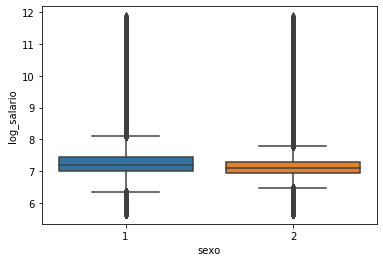

In [66]:
sns.boxplot(x="sexo", y="log_salario", data=new_df)

In [41]:
### Homens ganham mais do que mulheres;
import statsmodels.api as sm

X = new_df["sexo"] ## X usually means our input variables (or independent variables)
y = new_df["log_salario"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_salario   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                 2.269e+04
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        08:03:02   Log-Likelihood:            -1.4951e+06
No. Observations:             2232507   AIC:                         2.990e+06
Df Residuals:                 2232505   BIC:                         2.990e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3743      0.001   7669.357      0.000       7.372       7.376
sexo          -0.0968      0.001   -150.619      0.000      -0.098      -0.096
==============================================================================
Omnibus:                   886586.141   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6116878.358
Skew:                           1.761   Prob(JB):                         0.00
Kurtosis:                      10.305   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

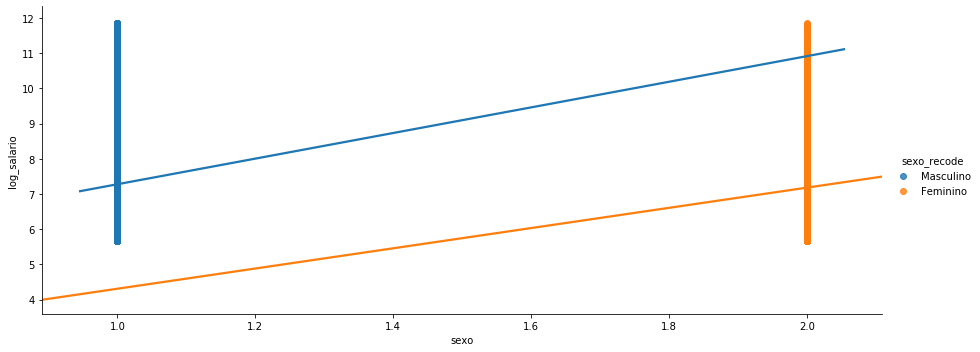

In [42]:
sns.lmplot(x='sexo', y='log_salario', data=new_df, hue = 'sexo_recode', ci=95, size=5, aspect=2.5)

### Variável Raça Cor

* Operacionaliza: etnia
* Categórica

In [43]:
def etnia_func(Cor):
    if Cor == 1:
        return "Indígena"
    elif Cor == 2:
        return "Branca"
    elif Cor == 4:
        return "Preta"
    elif Cor == 6:
        return "Amarela"
    elif Cor == 8:
        return "Parda"
    elif Cor == 9:
        return "Não Ident"
    elif Cor ==  -1:
        return "Ignorado"

In [44]:
new_df['etnia_recode'] = new_df['etnia'].apply(etnia_func)

In [45]:
new_df['etnia_recode'].value_counts(ascending = False)

Branca       969145
Parda        807917
Não Ident    302605
Preta        132459
Amarela       10857
Indígena       9524
Name: etnia_recode, dtype: int64

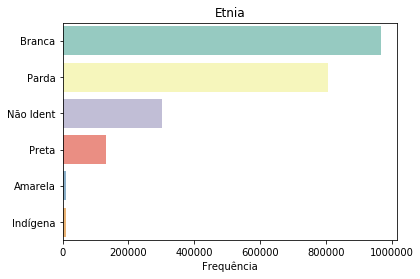

In [46]:
#Grafico de barras
ordem_cor = ['Branca', 'Parda', 'Não Ident', 'Preta', 'Amarela', 'Indígena']
ax = sns.countplot(data = new_df, y = 'etnia_recode', palette = "Set3", order = ordem_cor)
ax.set_yticklabels(ax.get_yticklabels(), ha="right")
#plt.tight_layout()

# Adicionar legenda
plt.title('Etnia')
plt.xlabel('Frequência') 
plt.ylabel('') 
plt.show()

### Correlação etnia x salário

In [47]:
## Correlação etnia x sexo
stats.pearsonr(new_df['log_salario'], new_df['etnia'])

(-0.12152307298678477, 0.0)

Text(0, 0.5, 'Etnia')

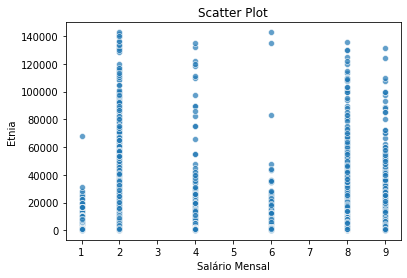

In [48]:
# Grafico de dispersao Salario x etnia
sns.scatterplot(x="etnia", y="salario_mensal", data=new_df, alpha = 0.7 )

## Adicionar legenda
plt.title('Scatter Plot')
plt.xlabel('Salário Mensal')
plt.ylabel('Etnia')

### Brancos ganham mais do que não brancos?

* Teste T
* Regressão Bivariada
* H0: $\hat{\beta}_1 = 0$

$\bar{x}_b = \bar{x}_o$
        
* Ha: $\hat{\beta}_1 < 0$

$\bar{x}_b > \bar{x}_o$

In [49]:
def branco(cor):
    if cor == 2:
        return "Branco"
    else:
        return "Outro"

In [50]:
new_df['branco_recode'] = new_df['etnia'].apply(branco)

In [51]:
new_df['branco_recode'].value_counts()

Outro     1263362
Branco     969145
Name: branco_recode, dtype: int64

In [52]:
def branco_num(cor):
    if cor == 2:
        return 1
    else:
        return 2

In [53]:
new_df['branco'] = new_df['etnia'].apply(branco_num)

In [54]:
## Correlação branco x salario mensal
stats.pearsonr(new_df['log_salario'], new_df['branco'])

(-0.1292945873723929, 0.0)

Text(0, 0.5, 'Salário Mensal')

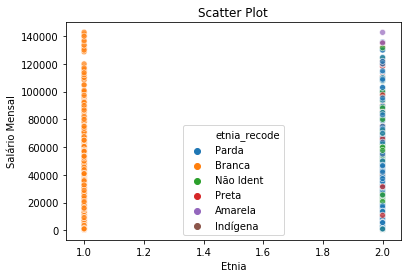

In [55]:
# Grafico de dispersao Salario x etnia
sns.scatterplot(x="branco", y="salario_mensal", data=new_df, hue = "etnia_recode", alpha = 0.7 )

## Adicionar legenda
plt.title('Scatter Plot')
plt.xlabel('Etnia')
plt.ylabel('Salário Mensal')

In [ ]:
#Media e Sd Branco
media_branco = new_df.log_salario[new_df.branco_recode == 'Branco'].mean()
media_branco
sd_branco = new_df.log_salario[new_df.branco_recode == 'Branco'].std()
sd_branco

In [ ]:
#Media e Sd Outro
media_outro = new_df.log_salario[new_df.branco_recode == 'Outro'].mean()
media_outro

sd_outro = new_df.log_salario[new_df.branco_recode == 'Outro'].std()
sd_outro

* Hipótese nula rejeitada;
* Em média brancos ganham 189,20 a mais do que as outras etnias.

In [58]:
# aplicando o t-test para médias de duas séries entre GSW e NOP
stats.ttest_ind(a=new_df.log_salario[new_df.branco_recode == 'Branco'],
                b=new_df.log_salario[new_df.branco_recode == 'Outro'], 
                equal_var = False) #desvio padrão diferente

Ttest_indResult(statistic=189.18744475452286, pvalue=0.0)

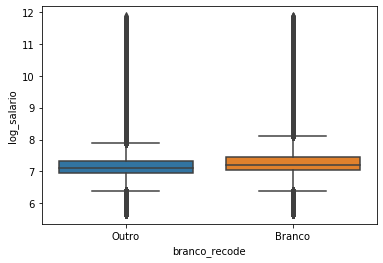

In [67]:
sns.boxplot(x="branco_recode", y="log_salario", data=new_df)

In [74]:
## Brancos ganham mais do que não brancos.
X = new_df["branco"] ## X usually means our input variables (or independent variables)
y = new_df["log_salario"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_salario   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                 3.796e+04
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:57:03   Log-Likelihood:            -1.4876e+06
No. Observations:             2232507   AIC:                         2.975e+06
Df Residuals:                 2232505   BIC:                         2.975e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4316      0.001   7112.143      0.000       7.430       7.434
branco        -0.1239      0.001   -194.822      0.000      -0.125      -0.123
==============================================================================
Omnibus:                   856876.591   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5775622.773
Skew:                           1.699   Prob(JB):                         0.00
Kurtosis:                      10.110   Cond. No.                         7.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

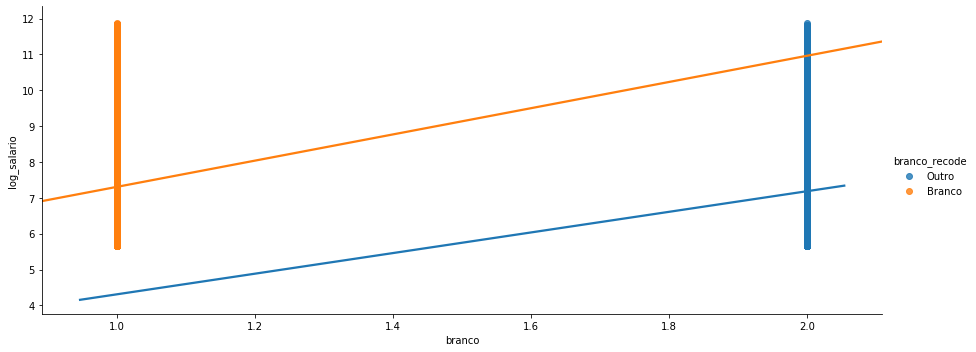

In [60]:
sns.lmplot(x='branco', y='log_salario', data=new_df, hue = 'branco_recode', ci=95, size=5, aspect=2.5)

### Pessoas com mais anos de estudo ganham mais?

* H0 = $$\hat{\beta}_1 = 0$$
* Ha = $$\hat{\beta}_1 > 0$$
$$\hat{Salario} = \hat{\beta}_0 + \hat{\beta}_1 * Grau de Instrucao + \hat{u}$$

In [61]:
X = new_df['grau_instrucao'] ## X usually means our input variables (or independent variables)
y = new_df["log_salario"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_salario   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                 1.635e+05
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        08:19:02   Log-Likelihood:            -1.4275e+06
No. Observations:             2232507   AIC:                         2.855e+06
Df Residuals:                 2232505   BIC:                         2.855e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.7081      0.001   4988.980      0.000       6.705       6.711
grau_instrucao     0.0803      0.000    404.387      0.000       0.080       0.081
==============================================================================
Omnibus:                   730657.303   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4480153.441
Skew:                           1.441   Prob(JB):                         0.00
Kurtosis:                       9.314   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

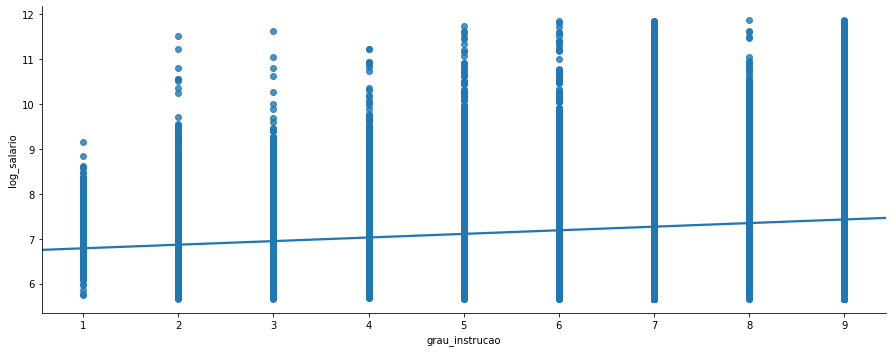

In [62]:
sns.lmplot(x='grau_instrucao', y='log_salario', data=new_df, ci=95, size=5, aspect=2.5)

### Heatmap

In [69]:
df_corr = new_df.drop(['branco_recode', 'etnia_recode', 'grau_recode', 'sexo_recode', 'salario_mensal'], axis =1)
df_corr = df_corr[df_corr.columns].astype(float)

In [ ]:
sns.heatmap(df_corr, cmap="YlGnBu")

### Regressão múltipla

$$\hat{Salario} = \hat{\beta}_0 + \hat{\beta}_1 * Grau de Instrucao + \hat{\beta}_2 * Sexo + \hat{\beta}_3 * Branco + \hat{u}$$

In [64]:
## Brancos ganham mais do que não brancos.
x = new_df[['grau_instrucao', 'sexo', 'branco']]
#x2 = new_df["sexo"]
#x3 = new_df["branco"] ## X usually means our input variables (or independent variables)
y = new_df["log_salario"] ## Y usually means our output/dependent variable
X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, x).fit() ## sm.OLS(output, input)
predictions = model.predict(x)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            log_salario   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.445e+07
Date:                Wed, 25 Mar 2020   Prob (F-statistic):                        0.00
Time:                        08:27:19   Log-Likelihood:                     -3.6599e+06
No. Observations:             2232507   AIC:                                  7.320e+06
Df Residuals:                 2232504   BIC:                                  7.320e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
grau_instrucao     0.6000      0.000   1450.572      0.000       0.599       0.601
sexo               0.7266      0.002    450.606      0.000       0.723       0.730
branco             1.3186      0.001    978.934      0.000       1.316       1.321
==============================================================================
Omnibus:                    90997.048   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102544.501
Skew:                           0.514   Prob(JB):                         0.00
Kurtosis:                       3.210   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regressão múltipla com interação

$$\hat{Salario} = \hat{\beta}_0 + \hat{\beta}_1 * Grau de Instrucao + \hat{\beta}_2 * Sexo + \hat{\beta}_3 * Branco + \hat{\beta}_4 * Grau*Sexo + \hat{u}$$ 

* Hipótese:

         - H0: grau de instrução tem um efeito linear sobre o salário de homens e mulheres.
         
$$\hat{\beta}_4 = 0$$ 

         - Ha: grau de instrução tem um maior efeito sobre o salário de mulheres. 
         
$$\hat{\beta}_4 > 0 $$ 

In [65]:
#Create new variable
new_df['int'] = new_df.sexo * new_df.grau_instrucao

model_multiply = smf.ols(formula='log_salario ~ grau_instrucao + sexo + branco + int', data=new_df).fit()
summary = model_multiply.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.5804,0.004,1829.047,0.000,7.572,7.589
grau_instrucao,0.0094,0.001,15.901,0.000,0.008,0.011
sexo,-0.5596,0.003,-191.591,0.000,-0.565,-0.554
branco,-0.1103,0.001,-181.648,0.000,-0.112,-0.109
int,0.0590,0.000,139.641,0.000,0.058,0.060


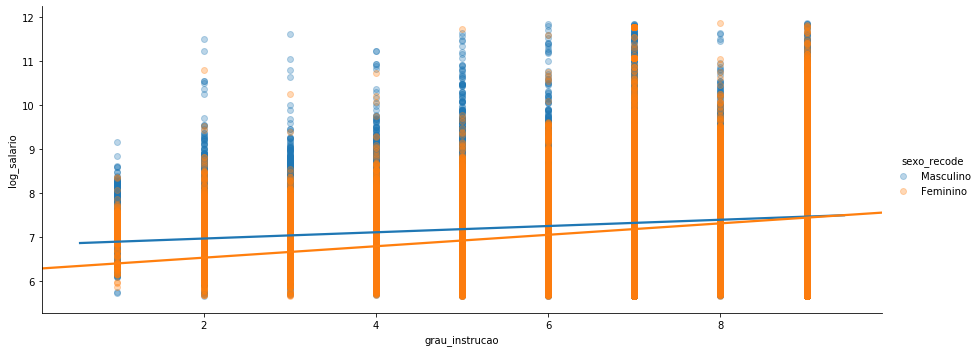

In [73]:
#new_df['grau_med'] = new_df.grau_instrucao > new_df.grau_instrucao.median()
#new_df['grau_med'] = np.where(new_df.grau_med == False, "Abaixo da Mediana", "Acima da Mediana")
sns.lmplot(x='grau_instrucao', y='log_salario', hue='sexo_recode', data=new_df, ci=None, size=5, aspect=2.5, scatter_kws={"alpha":0.3});